# **Analisis Sentimen Masyarakat terhadap Kebijakan Pendidikan**
Selamat datang dalam proyek Analisis Sentimen Masyarakat terhadap Kebijakan Pendidikan! Di era digital saat ini, media sosial seperti Twitter menjadi sarana utama bagi masyarakat untuk menyampaikan opini dan pandangan mereka terhadap berbagai isu publik, termasuk kebijakan pemerintah di bidang pendidikan.

Dalam proyek ini, kita akan mengeksplorasi bagaimana masyarakat merespons kebijakan-kebijakan pendidikan seperti “Kurikulum Merdeka”, “Kampus Merdeka”, atau proses “PPDB (Penerimaan Peserta Didik Baru)” melalui unggahan mereka di Twitter. Dengan menerapkan teknik analisis sentimen, kita akan mengklasifikasikan opini masyarakat ke dalam kategori positif, netral, atau negatif.

Analisis sentimen merupakan bagian dari Natural Language Processing (NLP) yang membantu dalam memahami emosi, opini, atau sikap dalam suatu teks. Proyek ini menggunakan bahasa pemrograman Python, serta berbagai pustaka seperti tweepy, NLTK, Sastrawi, scikit-learn, dan TensorFlow.

Tahapan dalam proyek ini mencakup:
- Pengambilan data tweet menggunakan kata kunci terkait kebijakan pendidikan,
- Preprocessing dan pembersihan teks,
- Pelabelan data secara manual atau semi-otomatis,
- Ekstraksi fitur teks (TF-IDF, Word2Vec, dll),
- Pelatihan dan evaluasi model machine learning untuk klasifikasi sentimen,
- Analisis dan visualisasi hasil klasifikasi sentimen masyarakat.

Melalui proyek ini, diharapkan dapat diperoleh wawasan yang lebih baik mengenai persepsi publik terhadap kebijakan pendidikan, sekaligus menjadi latihan praktis dalam bidang data science dan pemrosesan bahasa alami.

Mari kita mulai perjalanan ini dan pahami lebih dalam suara masyarakat terkait dunia pendidikan di Indonesia!

# **Import Library**

**Perintah dibawah untuk mengimpor semua library yang dibutuhkan dalam analisis ini**

In [26]:
# 📦 Library Umum
import pandas as pd  # untuk manipulasi dan analisis data tabel
import numpy as np  # untuk komputasi numerik dan array
import matplotlib.pyplot as plt  # untuk visualisasi grafik
import seaborn as sns  # visualisasi statistik yang lebih cantik
import datetime as dt  # manipulasi tanggal dan waktu
import re  # ekspresi reguler, untuk pattern matching di teks
import string  # berisi konstanta seperti tanda baca

# ⚙️ Pengaturan umum
pd.options.mode.chained_assignment = None  # mematikan peringatan 'chained assignment' di pandas
np.random.seed(0)  # mengatur seed random supaya hasil konsisten tiap kali dijalankan

# 🔠 Tokenisasi & Stopwords (Bahasa Indonesia)
import nltk  # Natural Language Toolkit, untuk NLP
nltk.download('punkt')  # mengunduh model tokenizer (kata)
nltk.download('stopwords')  # mengunduh daftar kata berhenti (stopwords)
from nltk.tokenize import word_tokenize  # fungsi untuk memisahkan kalimat jadi kata-kata
from nltk.corpus import stopwords  # daftar kata umum yang biasanya diabaikan

# 🇮🇩 Bahasa Indonesia - Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # untuk stemming bahasa Indonesia (mengubah kata ke bentuk dasar)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # untuk daftar stopword bahasa Indonesia

# ☁️ WordCloud
from wordcloud import WordCloud  # untuk membuat visualisasi awan kata

# 📊 Modeling
from sklearn.model_selection import train_test_split  # membagi data jadi data latih dan data uji
from sklearn.feature_extraction.text import TfidfVectorizer  # mengubah teks jadi fitur numerik
from sklearn.naive_bayes import MultinomialNB  # algoritma klasifikasi Naive Bayes
from sklearn.linear_model import LogisticRegression  # algoritma klasifikasi regresi logistik
from sklearn.svm import SVC  # algoritma klasifikasi Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # algoritma klasifikasi Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # metrik evaluasi model

# 🐦 Scraping Twitter
import snscrape.modules.twitter as sntwitter  # modul untuk scraping data twitter tanpa API


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scapping Dataset

Pada proyek ini, kita akan melakukan analisis sentimen terhadap opini dan komentar masyarakat di Twitter terkait kebijakan pendidikan di Indonesia. Pendidikan merupakan salah satu isu krusial dalam pembangunan bangsa, dan kebijakan yang dikeluarkan pemerintah sering kali menimbulkan berbagai reaksi dari publik.

Dengan mengumpulkan data tweet menggunakan teknik web scraping, kita akan mengolah berbagai tanggapan masyarakat untuk mengidentifikasi sentimen mereka — apakah bersifat positif, negatif, atau netral — terhadap kebijakan pendidikan tertentu, seperti kurikulum baru, program Merdeka Belajar, Ujian Nasional, dana BOS, dan lainnya.

Melalui serangkaian proses seperti pembersihan teks, ekstraksi fitur, dan pelatihan model machine learning, proyek ini bertujuan untuk memberikan gambaran yang lebih komprehensif tentang opini publik terhadap arah dan implementasi kebijakan pendidikan.

Hasil dari analisis ini diharapkan dapat memberikan masukan berharga bagi pemangku kebijakan, akademisi, serta masyarakat umum, sekaligus meningkatkan pemahaman kita tentang bagaimana kebijakan publik dipersepsikan oleh masyarakat melalui media sosial.

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import tweepy
from dotenv import load_dotenv
import os
import time

# Load token dari file .env
load_dotenv()

# Ambil token dari environment variables
BEARER_TOKEN = os.getenv("BEARER_TOKEN")

# Inisialisasi client tweepy dengan bearer token
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Fungsi untuk mengambil tweet dengan retry jika kena rate limit
def get_tweets_with_retry(client, query, max_results=100, retries=3, delay=900):
    attempt = 0
    while attempt < retries:
        try:
            tweets = client.search_recent_tweets(
                query=query,
                max_results=max_results,
                tweet_fields=["created_at", "text", "author_id", "lang"]
            )
            return tweets
        except tweepy.TooManyRequests:
            attempt += 1
            print(f"[⚠️] Rate limit. Menunggu {delay//60} menit... (Percobaan {attempt}/{retries})")
            time.sleep(delay)
    raise Exception("❌ Gagal ambil data setelah beberapa percobaan.")

# Query tweet tentang kebijakan pendidikan (tidak termasuk retweet dan bahasa Indonesia)
query = "kebijakan pendidikan -is:retweet lang:id"

# Ambil tweet
tweets = get_tweets_with_retry(client, query, max_results=100)

# Simpan data ke list
data = []
if tweets.data:
    for tweet in tweets.data:
        data.append([tweet.created_at, tweet.author_id, tweet.text])

# Buat DataFrame dari data yang sudah diambil
df = pd.DataFrame(data, columns=["Date", "UserID", "Tweet"])

# Tampilkan 5 data awal
print(df.head())


[⚠️] Rate limit. Menunggu 15 menit... (Percobaan 1/3)


In [29]:
# Menyimpan ulasan dalam file CSV
df.to_csv('tweets_kebijakan_pendidikan.csv', index=False, encoding='utf-8-sig')


# Loading Dataset

In [28]:
import pandas as pd

# Load dataset dari file CSV
tweets_df = pd.read_csv('tweets_kebijakan_pendidikan.csv')

# Cek ukuran dataset (baris, kolom)
print(tweets_df.shape)

# Tampilkan beberapa data teratas
print(tweets_df.head())


(99, 3)
                        Date               UserID  \
0  2025-05-31 13:11:27+00:00             23786106   
1  2025-05-31 12:34:43+00:00  1601504650452094978   
2  2025-05-31 11:51:49+00:00            954644996   
3  2025-05-31 10:29:31+00:00            169902541   
4  2025-05-31 10:26:44+00:00             44338807   

                                               Tweet  
0  Keputusan Pendidikan Gratis MK, Siapa Paling P...  
1  @DS_yantie Hmmmm kmrn makarin udah menghancurk...  
2  @SuhardiSuh66239 Ekspresi ternak kadrun GOBLOK...  
3  Putusan MK tentang wajibnya pendidikan gratis ...  
4  Digratiske. Trus sing dinggo bayar gaji guru k...  


**Loading Dataset**

In [30]:
import pandas as pd

# Load dataset dari file CSV
tweets_df = pd.read_csv('tweets_kebijakan_pendidikan.csv')

# Cek ukuran dataset (baris, kolom)
print(tweets_df.shape)

# Tampilkan beberapa data teratas
print(tweets_df.head())


(99, 4)
                        Date               UserID  \
0  2025-05-31 13:11:27+00:00             23786106   
1  2025-05-31 12:34:43+00:00  1601504650452094978   
2  2025-05-31 11:51:49+00:00            954644996   
3  2025-05-31 10:29:31+00:00            169902541   
4  2025-05-31 10:26:44+00:00             44338807   

                                               Tweet  Clean_Tweet  
0  Keputusan Pendidikan Gratis MK, Siapa Paling P...          NaN  
1  @DS_yantie Hmmmm kmrn makarin udah menghancurk...          NaN  
2  @SuhardiSuh66239 Ekspresi ternak kadrun GOBLOK...          NaN  
3  Putusan MK tentang wajibnya pendidikan gratis ...          NaN  
4  Digratiske. Trus sing dinggo bayar gaji guru k...          NaN  


In [31]:
# Menampilkan informasi tentang DataFrame tweets_df
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         99 non-null     object 
 1   UserID       99 non-null     int64  
 2   Tweet        99 non-null     object 
 3   Clean_Tweet  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


*Insight :*
- Dataset terdiri dari 99 baris dan 3 kolom.

- Kolom-kolom yang ada adalah:
    - Date (tanggal dan waktu tweet), bertipe object (string),
    - UserID (ID pengguna Twitter), bertipe int64 (angka integer),
    - Tweet (isi teks tweet), bertipe object (string).

- Semua kolom tidak memiliki nilai kosong (null), artinya data lengkap di semua kolom.

- Dataset relatif kecil dengan penggunaan memori sekitar 2.4 KB.

**Mengecek Nilai NaN Secara Keseluruhan**

In [32]:
df.isnull().values.any()


np.False_

**Menghitung Nilai NaN di Tiap Kolom**

In [33]:
df.isnull().sum()


Date           0
UserID         0
Tweet          0
Clean_Tweet    0
dtype: int64

*Insight :*
DataFrame bersih tidak terdapat nilai NaN sama sekali.

**Mengecek Data Duplikat**


In [34]:
df.duplicated()


0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

*Insight :*
Tidak ada Data Duplikat di dalam DataFrame.

# Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [35]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download resource NLTK (hanya sekali saja diperlukan)
nltk.download('punkt')
nltk.download('stopwords')

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 1. Cleaning Text
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # remove hashtag
    text = re.sub(r'RT[\s]+', '', text)         # remove RT
    text = re.sub(r"http\S+", '', text)         # remove link
    text = re.sub(r'\n', ' ', text)             # replace newline
    text = re.sub(r'[0-9]+', '', text)          # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()                         # remove leading/trailing space
    return text

# 2. Case Folding
def casefoldingText(text):
    return text.lower()

# 3. Tokenizing
def tokenizingText(text):
    return word_tokenize(text)

# 4. Filtering (Remove Stopwords)
def filteringText(tokens):
    listStopwords = set(stopwords.words('indonesian'))
    tambahan_stopword = ['iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa','loh','kah','woi','woii','woy']
    listStopwords.update(tambahan_stopword)
    filtered = [word for word in tokens if word not in listStopwords]
    return filtered

# 5. Stemming
def stemmingText(words):
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

# 6. Gabungkan kata-kata jadi kalimat
def toSentence(words):
    return ' '.join(words)

# 7. Fungsi full preprocessing
def fullPreprocessing(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    tokens = tokenizingText(text)
    filtered = filteringText(tokens)
    stemmed = stemmingText(filtered)
    return toSentence(stemmed)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Download resource yang dibutuhkan
nltk.download('stopwords')  # Tidak butuh punkt lagi

# Load stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Inisialisasi tokenizer (ambil hanya kata yang mengandung huruf)
tokenizer = RegexpTokenizer(r'\b\w+\b')

# Fungsi preprocessing
def fullPreprocessing(text):
    try:
        tokens = tokenizer.tokenize(str(text))  # Tokenisasi pakai regex, tidak perlu punkt
        tokens = [word.lower() for word in tokens if word.isalpha()]  # Hanya huruf, lowercase
        tokens = [word for word in tokens if word not in stop_words]  # Hapus stopwords
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error: {e}")
        return ""


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# Baca file CSV
df = pd.read_csv("tweets_kebijakan_pendidikan.csv")

# Terapkan preprocessing ke kolom Tweet
df['Clean_Tweet'] = df['Tweet'].apply(fullPreprocessing)

# Tampilkan hasil
print(df[['Tweet', 'Clean_Tweet']].head())


                                               Tweet  \
0  Keputusan Pendidikan Gratis MK, Siapa Paling P...   
1  @DS_yantie Hmmmm kmrn makarin udah menghancurk...   
2  @SuhardiSuh66239 Ekspresi ternak kadrun GOBLOK...   
3  Putusan MK tentang wajibnya pendidikan gratis ...   
4  Digratiske. Trus sing dinggo bayar gaji guru k...   

                                         Clean_Tweet  
0  keputusan pendidikan gratis mk https t co dnny...  
1  hmmmm kmrn makarin udah menghancurkan generasi...  
2  ekspresi ternak kadrun goblokkkk jg mahasiswa ...  
3  putusan mk wajibnya pendidikan gratis apresias...  
4  digratiske trus sing dinggo bayar gaji guru ka...  


*Insight :*
1. Setiap kalimat telah diubah dari huruf kapital menjadi huruf kecil, begitu juga setiap simbol telah berhasil dihapus.

2. Topik Populer yang Sering Muncul:
- Kata-kata seperti “pendidikan”, “gratis”, “mk”, “putusan” menunjukkan bahwa pengguna aktif membahas putusan Mahkamah Konstitusi tentang pendidikan gratis.
- Ada juga kemunculan kata emosional seperti “goblokkkk”, “menghancurkan”, dan “digratiske” yang mengindikasikan perdebatan atau sentimen kuat.

3. Sentimen Positif:
- “putusan mk wajibnya pendidikan gratis apresiasi”
    - Ini mengandung kata positif seperti “apresiasi”, menunjukkan dukungan terhadap kebijakan tersebut.

4. Sentimen Negatif:
- “makarin udah menghancurkan generasi”
- “ekspresi ternak kadrun goblokkkk jg mahasiswa”
    - Mengandung nada kemarahan dan kritik yang sangat kuat terhadap aktor atau dampak kebijakan.

# Pelabelan

In [66]:
df['Sentimen'] = ""  # Buat kolom kosong dulu
df.to_csv("tweet_labeling.csv", index=False)


In [74]:
import pandas as pd

df = pd.read_csv("tweet_labeling.csv")
print(df[['Tweet', 'Clean_Tweet']].head(10))


                                               Tweet  \
0  Keputusan Pendidikan Gratis MK, Siapa Paling P...   
1  @DS_yantie Hmmmm kmrn makarin udah menghancurk...   
2  @SuhardiSuh66239 Ekspresi ternak kadrun GOBLOK...   
3  Putusan MK tentang wajibnya pendidikan gratis ...   
4  Digratiske. Trus sing dinggo bayar gaji guru k...   
5  Trump terus menelurkan kebijakan-kebijakan ter...   
6  Trump terus menelurkan kebijakan-kebijakan ter...   
7  KPK mendorong rencana baik Kemendikti Saintek ...   
8  KPK mendorong rencana baik Kemendikti Saintek ...   
9  KPK mendorong rencana baik Kemendikti Saintek ...   

                                         Clean_Tweet  
0  keputusan pendidikan gratis mk https t co dnny...  
1  hmmmm kmrn makarin udah menghancurkan generasi...  
2  ekspresi ternak kadrun goblokkkk jg mahasiswa ...  
3  putusan mk wajibnya pendidikan gratis apresias...  
4  digratiske trus sing dinggo bayar gaji guru ka...  
5  trump menelurkan kebijakan kebijakan terkait m... 

In [75]:
positif_keywords = ['apresiasi', 'bagus', 'setuju', 'bermanfaat']
negatif_keywords = ['goblok', 'menghancurkan', 'buruk', 'salah']

def label_sentimen(text):
    for word in positif_keywords:
        if word in text:
            return 'Positif'
    for word in negatif_keywords:
        if word in text:
            return 'Negatif'
    return 'Netral'

df['Sentimen'] = df['Clean_Tweet'].apply(label_sentimen)


In [76]:
print(df[['Clean_Tweet', 'Sentimen']].head(10))
print(df['Sentimen'].value_counts())


                                         Clean_Tweet Sentimen
0  keputusan pendidikan gratis mk https t co dnny...   Netral
1  hmmmm kmrn makarin udah menghancurkan generasi...  Negatif
2  ekspresi ternak kadrun goblokkkk jg mahasiswa ...  Negatif
3  putusan mk wajibnya pendidikan gratis apresias...  Positif
4  digratiske trus sing dinggo bayar gaji guru ka...   Netral
5  trump menelurkan kebijakan kebijakan terkait m...   Netral
6  trump menelurkan kebijakan kebijakan terkait m...   Netral
7  kpk mendorong rencana kemendikti saintek menge...   Netral
8  kpk mendorong rencana kemendikti saintek menge...   Netral
9  kpk mendorong rencana kemendikti saintek menge...   Netral
Sentimen
Netral     88
Negatif     7
Positif     4
Name: count, dtype: int64


In [77]:
df.to_csv("tweet_labeling.csv", index=False)


 **1. Eksplorasi dan Analisis Data Label**

In [79]:
# 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# 2. Baca data
df = pd.read_csv("tweet_labeling.csv")

# 3. Hapus baris yang Sentimen-nya kosong
df = df.dropna(subset=['Sentimen'])

**2. Siapkan Data untuk Pelatihan Model**
- Pisahkan data jadi fitur (X) dan label (y)
- Bagi data ke training dan testing

In [80]:
# 4. Pisahkan fitur dan label
X = df['Clean_Tweet']
y = df['Sentimen']

# 5. Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**3. Ekstraksi Fitur (Text Vectorization)**

In [83]:
# 6. TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. Oversampling pada data training
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_tfidf, y_train)

from collections import Counter
print("Sebelum oversampling:", Counter(y_train))
print("Sesudah oversampling:", Counter(y_train_bal))


Sebelum oversampling: Counter({'Netral': 70, 'Negatif': 7, 'Positif': 2})
Sesudah oversampling: Counter({'Netral': 70, 'Negatif': 70, 'Positif': 70})


**4. Latih Model Klasifikasi Menggunakan Logistic Regression**

In [84]:
# 8. Training model
model = LogisticRegression(max_iter=200)
model.fit(X_train_bal, y_train_bal)

# 9. Evaluasi
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Netral       0.90      1.00      0.95        18
     Positif       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



c:\Users\ADVAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADVAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADVAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

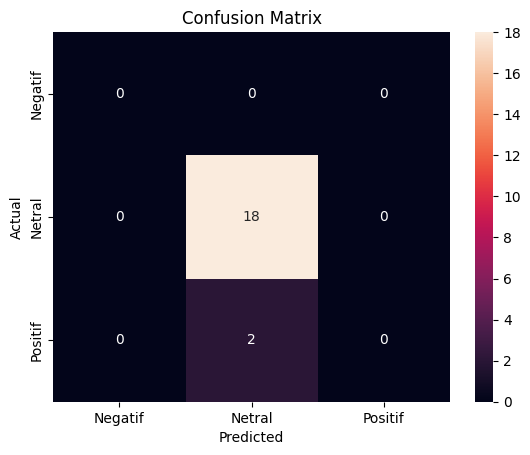

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [87]:
import joblib

# Simpan model
joblib.dump(model, 'logistic_regression_model.h5')

# Simpan vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.h5')


['tfidf_vectorizer.h5']